## Importing Libraries

In this notebook, we'll examine the impact of choosing n in our n-grams across two libraries of texts. Onelibrary is comprised of several full-length novels, while another consists of articles of varying lenghts. We'llﬁrst deﬁne several helper functions that will be re-used throughout this process (each one is commented).We'll then proceed to evaluate our choice of n, per library, and then ﬁnally, use that n-value to compare ourlibrary of texts and return Jaccard similarity values for the more similiar texts.

In [2]:
from __future__ import division
import nltk
import string
import os
from nltk.corpus import stopwords
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np

## Defining Functions

In [3]:
def ngram_compare_files(file1,file2,n):
    # Takes two files
    # hashes their n-grams into twos lists
    # calculates the intersection and union
    # of the two lists, and returns
    # Jacard similarity value
 
    stop = stopwords.words('english')
    f1 = open(file1)
    raw = f1.read()
    f1.close()
    f1_grams = nltk.ngrams(raw.split(),n)
    
    array_1 = []
    
    for gram in f1_grams:
        array_1.append(hash(gram))
    f2 = open(file2)
    raw = f2.read()
    f2.close()
    f2_grams = nltk.ngrams(raw.split(),n)
    
    array_2 = []
    
    for gram in f2_grams:
        array_2.append(hash(gram))
        
    intersection = len(list(set(array_1).intersection(array_2)))    
    union = len(set(array_1)) + len(set(array_2)) - intersection
    jacard_similarity = intersection / union
    return jacard_similarity


def pairs_of_files(directory):
    # returns combination of two files given
    # all files in a directory
    
    dir = os.listdir(directory)
    combo = combinations(dir, 2)
    return combo

def compare_files(directory,ngram_size,threshold):
    # compares all pairs of files in a directory
    # for similarity.
    # RETURNS: Dictionary, with key as
    # comma-separated string of two files
    # and value of similarity index as decimal
    # where similarity index is above threshold
    # value.
    
    compare_dictionary = {}
    
    ngram = ngram_size
    combo = pairs_of_files(directory)
    
    for i in combo:
        
        sim = ngram_compare_files(directory+str(i[0]),directory+str(i[1]),ngram)
        if sim > threshold:
            
            key = str(i[0]) + "," + str(i[1])
            value = sim
            compare_dictionary[key]=value
            
    return compare_dictionary            

## Choosing 'N'

In order to determine a proper N-value for a n-grams, we evaluate the impact of N over a range of 2 to 20.
We do this by repeating our similarity measure (Jaccardian similarity) for each N, and plotting similairity.

### Running for Books

In [4]:
dir = '/Users/berryjiang/Downloads/'

In [5]:
x = []
y = []
yall = []

for n in range(2,20):
        
    books_comparison = compare_files(dir+'Assignment 3 Books/',ngram_size=n,threshold=-1)
    a = np.zeros(len(books_comparison))
    counter = 0
    for key, value in books_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    x.append(n)
    yall.append(a*100)
    y.append(a.mean()*100)

Plot the distributions

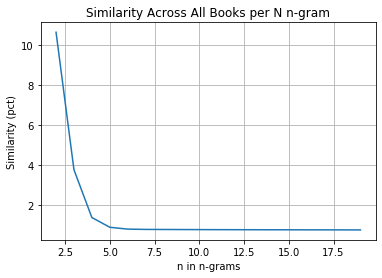

In [6]:
plt.plot(x,y, linestyle = '-')
#plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Similarity Across All Books per N n-gram')
plt.grid()
plt.show()

Based on the graph above, we can see that the mean similarity index is higher when number of n chosen is smaller, which make sense as the smaller the n, and easier to have overlap words in the phrase, which will lead to a higher similarity index value. When n is small (below 3), the similarity values could be between 10% to 4%. On the other hand, when n is large, the similarity values maintain at around 1%. We can see that the elbow value of number of n is around n=4, which has a mean similar value of around 1%. Therefore, we selected the number of n to be 4 and set our threshold to 1% to evaluation the similarity values for all the pairs of books. 

### Running for Articles

In [8]:
x = []
y = []
yall = []

for n in range(2,20):
    
    art_comparison = compare_files(dir+'Assignment 3 Articles/',ngram_size=n,threshold=-1)
    a = np.zeros(len(art_comparison))
    counter = 0
    for key, value in art_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    x.append(n)
    yall.append(a*100)
    y.append(a.mean()*100)

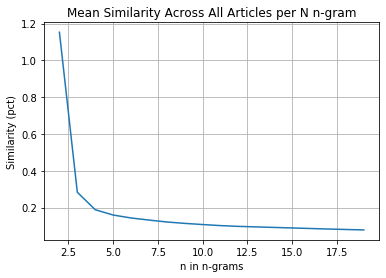

In [9]:
plt.plot(x,y, linestyle = '-')
#plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Mean Similarity Across All Articles per N n-gram')
plt.grid()
plt.show()

Based on the graph above, we can see that when n is small (n < 4), the similarity value increase exponentially when n decrease. On the other hand, when n is large (n >=4), the similarity values decrease at a very slow rate and maintain at around 0.075%. We can see that the elbow value of number of n is around n=3, which has a mean similar value of around 0.3%. Therefore, we selected the number of n to be 3. Since there are many pairs of articles within the total of 40 samples, we decided to set our threshold higher than the mean similarity value in order to better present the top similar pairs of article. We select a threshold value of 1.2%.

Compare between mean similarity value for books and articles: 
Based on the graphs above, we can see the elbow value of the mean similarity value graph for books and articles is very similar (around n=3 or 4). I would not expect the selected n value to be too different for books and articles since all the books and articles are in the same language, which should have a similar number of gram that works. Plus, three-grams, four-grams, and five-grams have been the popular options for n-gram algorithm as they have relatively better and more stable performance. 
One major difference between the the mean similarity value graph for books and articles is the range of mean similarity value for books (1%-10%) is a lot wider than the range of the mean similarity value for articles (0.2%-1.2%). However, based on the similarity value comparsion below, the highest similar value for books for n=4 is around 2% while the highest similarity value for articles when n=3 is as high as 72%. One reasons for this difference is because there are a lot more numbers of pairs of articles as compares to numbers of pairs of books, so the mean similarity value for articles shifted to a very low value as most pairs of articles are not similar. 

## Books measuring similarity

After having our n for books chosen as '4', we'll examine the similairty of our set of books, and use a
threshold value of 1%. This threshold value will filter our any books with similarities below that value, in order
to allow us to focus on the most promininent combinations of books that are similar.

In [11]:
books_comparison = compare_files(dir+'Assignment 3 Books/',ngram_size=4,threshold=0.01)


for k,v in books_comparison.items():
    book1, book2 = k.split(',')
    similarity_index = v
    print ("1")
    print (str(book1) + " is similar to " + str(book2) + 
           " with a Similarity Index of " + '{percent:.3%}'.format(percent=similarity_index) +"\n" +"\n")
    

1
Adventures_of_Sherlock_Holmes.txt is similar to Return_of_Sherlock_Holmes.txt with a Similarity Index of 2.332%


1
Adventures_of_Sherlock_Holmes.txt is similar to Hound_of_the_Baskervilles.txt with a Similarity Index of 2.444%


1
Return_of_Sherlock_Holmes.txt is similar to Hound_of_the_Baskervilles.txt with a Similarity Index of 2.430%




Based on the result above, we can see that "Adventure of Sherlock Holmes" and "Hound of the Baskervilles" are the most similar book with a similairty index of 2.44%. The book "Return of Sherlock Holmes" and "Hound of the Baskervilles" have a similarity index that is slightly below the highest (2.43%). The third most similar books are "Adventure of Sherlock Holmes" and "Return of Sherlock Holmes", which have a similarity index of 2.332%. All of these three books have similarity indexes are very close to each other, which means all three books are similar. Unlike the book "3boat10", which has its similarity indexes with all other books are below the threshold of 1%, which means this book is not similar to any of the three books. 

## Articles measuring similarity

After having our n for articles chosen as '3', we'll examine the similairty of our set of articles, and use a
threshold value of 0.3%. This threshold value will filter our any articles with similarities below that value, in
order to allow us to focus on the most promininent combinations of articles that are similar.

In [14]:
articles_comparison = compare_files(dir+'Assignment 3 Articles/',ngram_size=3,threshold=0.012)


for k,v in articles_comparison.items():
    art1, art2 = k.split(',')
    similarity_index = v
    print (str(art1) + " is similar to " + str(art2) + 
           " with a Similarity Index of " + '{percent:.3%}'.format(percent=similarity_index) +"\n" +"\n")

article8.txt is similar to article14.txt with a Similarity Index of 1.277%


article18.txt is similar to article4.txt with a Similarity Index of 2.857%


article18.txt is similar to article1.txt with a Similarity Index of 3.681%


article18.txt is similar to article3.txt with a Similarity Index of 3.150%


article30.txt is similar to article25.txt with a Similarity Index of 1.266%


article30.txt is similar to article21.txt with a Similarity Index of 2.183%


article31.txt is similar to article26.txt with a Similarity Index of 8.000%


article31.txt is similar to article32.txt with a Similarity Index of 2.151%


article31.txt is similar to article28.txt with a Similarity Index of 8.621%


article26.txt is similar to article32.txt with a Similarity Index of 2.597%


article26.txt is similar to article28.txt with a Similarity Index of 9.790%


article32.txt is similar to article28.txt with a Similarity Index of 2.778%


article36.txt is similar to article35.txt with a Similarity Index of

Based on the result above, we can see that article17 and article16 are the most similar articles with a similairty index of 72%. This similarity value is very high among the rest of the pairs as we can see the next most similar pair of articles only have a similarity value of 21% (article 10 and article 13). One pattern that we see is the most pair of articles that have similarity index above our threshold are articles that have indexes close to each other (article 16 and 17, article 10 and 13, article 4 and 3, etc.). 